In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option("display.max_columns", None)

In [3]:
datasets = "car_data.csv"
df_datasets = pd.read_csv(datasets)
df_datasets.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [4]:
print("Dimension: %d baris dan %d kolom" %(df_datasets.shape[0], df_datasets.shape[1]))

Dimension: 550 baris dan 12 kolom


In [5]:
df_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [6]:
df_datasets.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [7]:
df_datasets.dropna(inplace=True)
print(df_datasets.isnull().sum())
df_datasets.head()

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [8]:
df_unique_class = df_datasets["class"].value_counts().sort_values()
df_unique_class

class
midsize station wagon               2
small pickup truck                  7
standard pickup truck               7
minivan                             8
small station wagon                11
large car                          13
minicompact car                    21
standard sport utility vehicle     34
midsize car                        53
two seater                         69
subcompact car                     83
compact car                        83
small sport utility vehicle       157
Name: count, dtype: int64

In [9]:
df_datasets2 = df_datasets.copy()

x = df_datasets2["model"]
y = df_datasets2["combination_mpg"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'patriot 4wd'

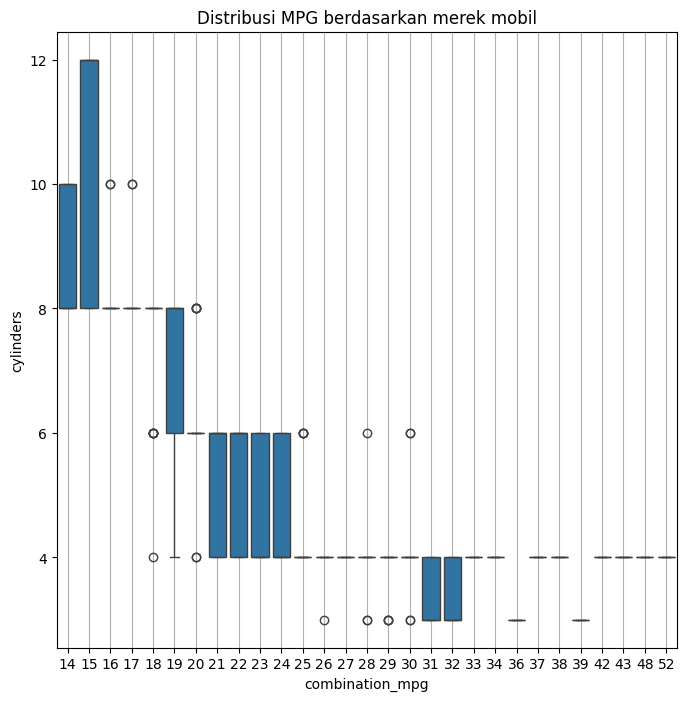

In [150]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="combination_mpg", y="", data=df_datasets)
plt.title("Distribusi MPG berdasarkan merek mobil")
plt.grid(axis="x")
plt.show()

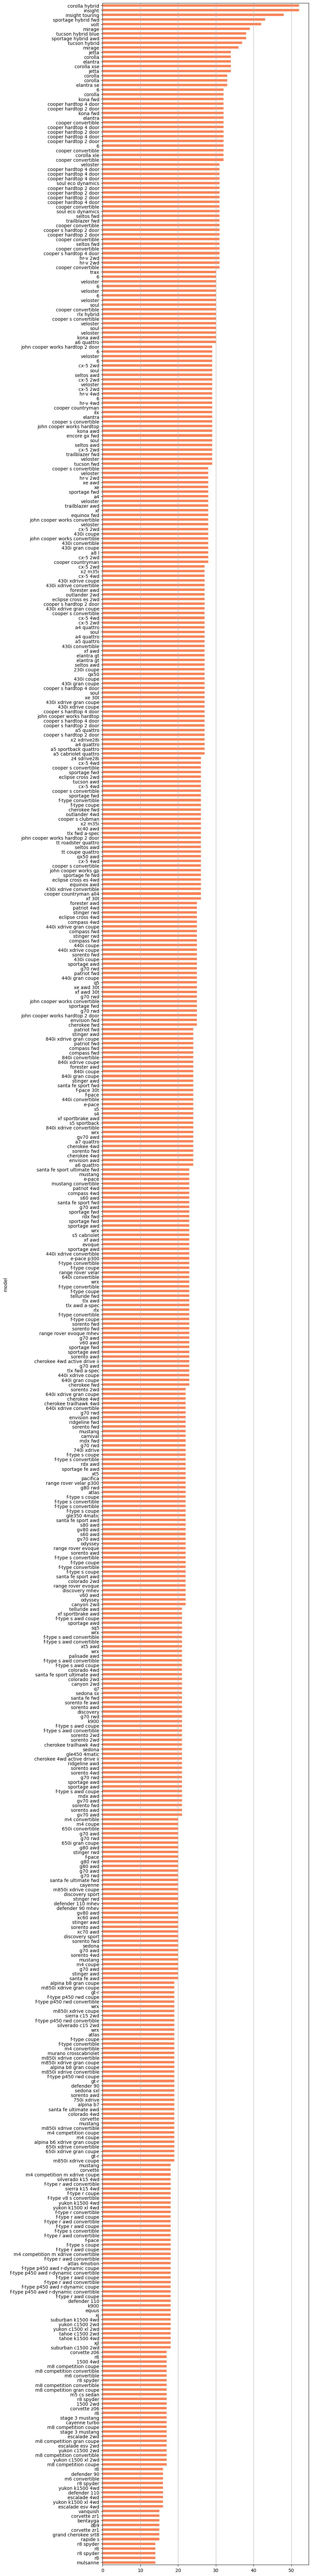

In [105]:
df_datasets_top20 = df_datasets.sort_values(by="combination_mpg")

df_datasets_top20 = df_datasets_top20.set_index("model")

plt.figure(figsize=(8, 100))
df_datasets_top20["combination_mpg"].plot(kind="barh", color="coral")
plt.grid(axis="x")

plt.show()